# Regresión polinómica


La Regresión Polinomial es un caso especial de la Regresión Lineal y es muy parecido a ella, la diferencia es que los coeficienets no son lineales por lo que se debe implementar polinomios de grado n para obtener el modelo.

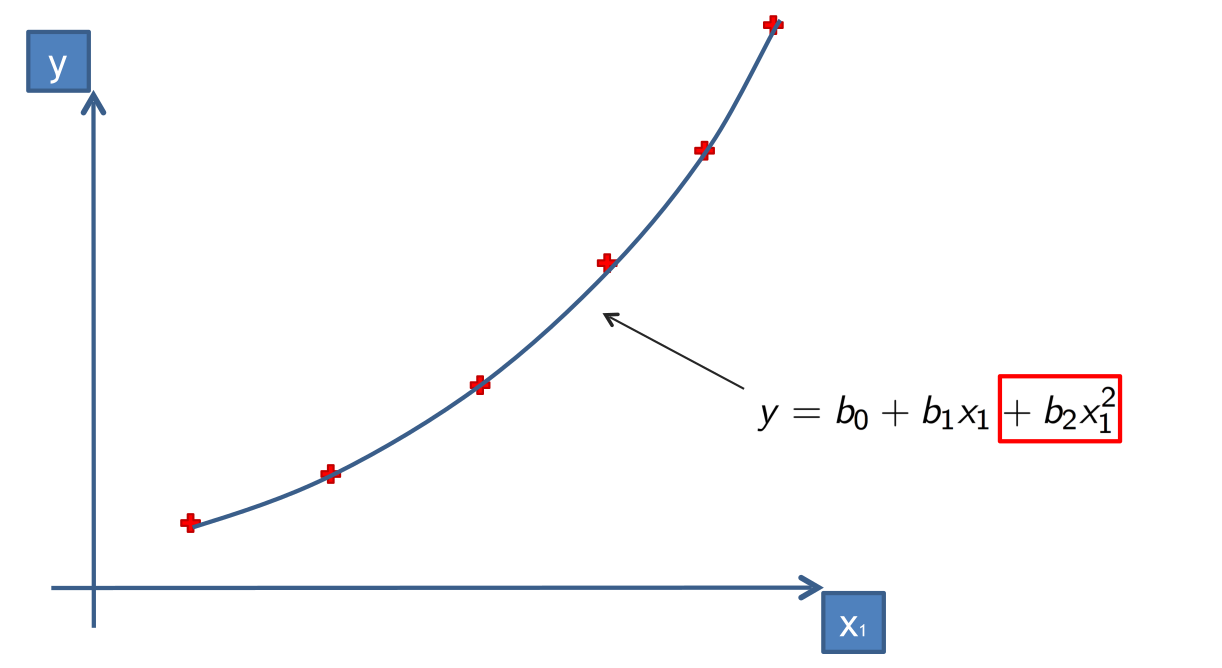




Un término polinomial, bien sea cuadrático o cúbico, convierte un modelo de Regresión Lineal en una curva, pero como los datos de “X” son cuadráticos o cúbicos pero el coeficiente “b” no lo es, todavía se califican como un modelo lineal.





Esto hace que sea una forma agradable y directa de modelar curvas sin tener que modelar modelos complicados no lineales.
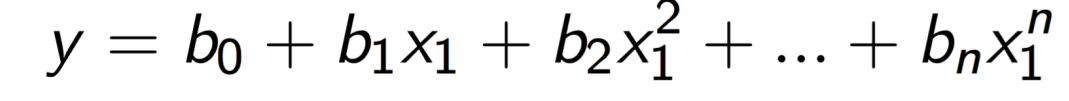


#Preparamos el entorno

In [3]:
from google.colab import drive # Montar tu Google drive
from google.colab import drive
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



!git clone https://github.com/alexxsnjr/machine_learning-examples.git
drive.mount('/content/drive')

dataset = pd.read_csv('/content/machine_learning-examples/datasets/Position_Salaries.csv')

print("------dataset-------")
print(dataset)


fatal: destination path 'machine_learning-examples' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
------dataset-------
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Del dataset podemos ver que tenemos position y level para predecir el salario.
Pero , como vemos que la posición y el nivel son equivalentes nos quedamos solo con la columna level como independiente y salary como dependiente.

*Como nuestro dataset es muy pequeño no vamos a dividirlo en entrenamiento y test ya que no tendriamos datos suficientes y esto es solo un ejemplo.

In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#Ajustamos la regresión polinomica

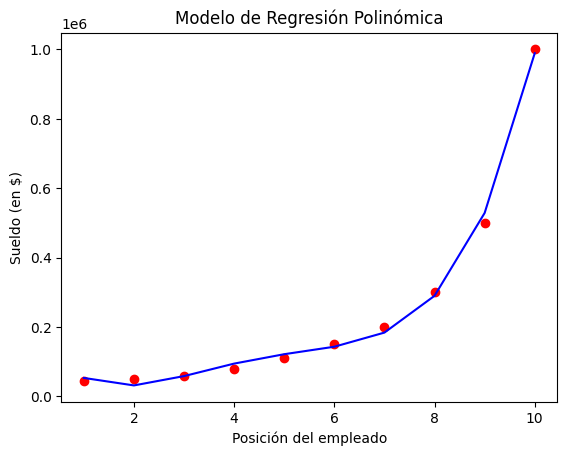

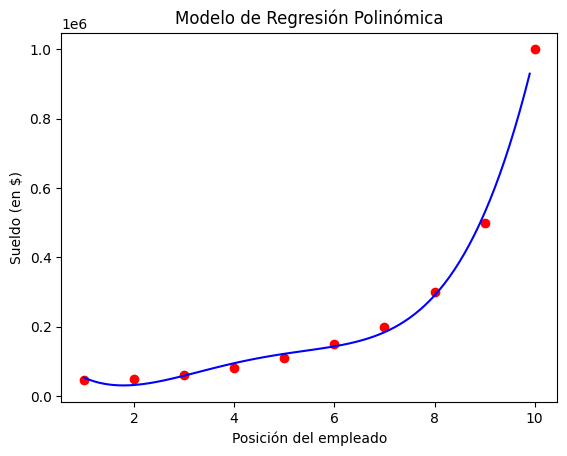

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Aplicamos las transformaciones polinomica a las variables independientes con grado 4 (podemos probar otros grados a ver cual se ajusta mejor)
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg_pol = LinearRegression()
lin_reg_pol.fit(X_poly, y)
y_pred = lin_reg_pol.predict(poly_reg.fit_transform(X))
#visualización prediccion
plt.scatter(X, y, color = "red")
plt.plot(X, y_pred, color = "blue")
plt.title("Modelo de Regresión Polinómica")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()


#Creamos puntos intermedios para suavizar la curva dela grafica
X_grid = np.arange(min(X), max(X), 0.1) #creamos intervalos de 0.1 en 0.1
X_grid = X_grid.reshape(len(X_grid), 1)
y_pred = lin_reg_pol.predict(poly_reg.fit_transform(X_grid))

plt.scatter(X, y, color = "red")
plt.plot(X_grid, y_pred, color = "blue")
plt.title("Modelo de Regresión Polinómica")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

# Ejemplo si hubiesemos usado una regresión lineal

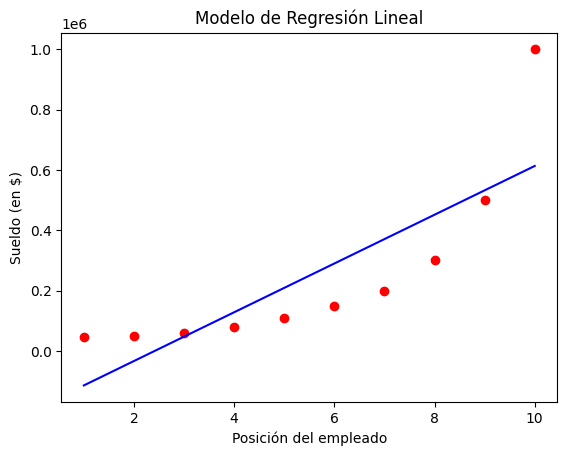

In [6]:
# Ajustar la regresión lineal con el dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

#visualización
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

#Predicción en base a una sola caracteristica


In [19]:
pred_linear_reg = lin_reg.predict([[6.5]])
print("Segun nuestro modelo de regresion lineal, nuestro empleado con 6.5 años de exp deberia cobrar " + str(round(pred_linear_reg[0],2)) );


pred_poly_reg = lin_reg_pol.predict(poly_reg.fit_transform([[6.5]]))
print("Segun nuestro modelo de regresion polinomica, nuestro empleado con 6.5 años de exp deberia cobrar " + str(round(pred_poly_reg[0],2)) );

Segun nuestro modelo de regresion lineal, nuestro empleado con 6.5 años de exp deberia cobrar 330378.79
Segun nuestro modelo de regresion polinomica, nuestro empleado con 6.5 años de exp deberia cobrar 158862.45
